In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df=yf.download('MSFT',start='2018-01-01',end='2019-11-22')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,80.229004,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,80.602394,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,81.311798,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,82.319916,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,82.403908,22113000
...,...,...,...,...,...,...
2019-11-15,148.929993,149.990005,148.270004,149.970001,144.026718,23485700
2019-11-18,150.070007,150.550003,148.979996,150.339996,144.382050,21534000
2019-11-19,150.880005,151.330002,150.199997,150.389999,144.430038,23935700


In [3]:
df['log returns']=np.log(df['Close']/df['Close'].shift(1)).dropna()
df['vol']=df['log returns'].rolling(21).std()*np.sqrt(252)
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,log returns,vol
Date,,,,,,,,
2018-02-01,94.790001,96.070000,93.580002,94.260002,87.985893,47227900,-0.007925,0.169472
2018-02-02,93.639999,93.970001,91.500000,91.779999,85.670944,47867800,-0.026663,0.200712
2018-02-05,90.559998,93.239998,88.000000,88.000000,82.142563,51031500,-0.042058,0.252537
2018-02-06,86.889999,91.480003,85.250000,91.330002,85.250908,67998600,0.037143,0.280307
2018-02-07,90.489998,91.769997,89.199997,89.610001,83.645386,41107600,-0.019012,0.289333
...,...,...,...,...,...,...,...,...
2019-11-15,148.929993,149.990005,148.270004,149.970001,144.026718,23485700,0.012818,0.162365
2019-11-18,150.070007,150.550003,148.979996,150.339996,144.382050,21534000,0.002464,0.145600
2019-11-19,150.880005,151.330002,150.199997,150.389999,144.430038,23935700,0.000333,0.145753


[]

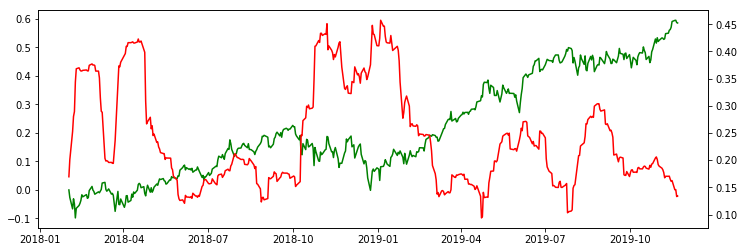

In [4]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot((1*(1+df['Close'].pct_change()).cumprod()-1).fillna(0),color='g')
ax2=ax.twinx()
ax2.plot(df['vol'],color='r')
plt.plot()